各国のABO血液型割合を3Dプロットする
===
---

## 1. 準備
### 1.1. import

In [1]:
import urllib
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### 1.2. ダウンロード・スクレイピング

In [2]:
def maybe_download(url, name):
    """ ファイルがなければダウンロード """
    if not os.path.exists(name):
        urllib.urlretrieve(url, name)
        print "File " + name + " downloaded!"
    return name

In [3]:
url = "https://ja.wikipedia.org/wiki/ABO%E5%BC%8F%E8%A1%80%E6%B6%B2%E5%9E%8B"
name = maybe_download(url, "blood_data.html")
with open(name, "r") as f:
    html = f.read()
soup = BeautifulSoup(html)

/usr/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/local/Cellar/python/2.7.14/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [4]:
table = soup.find_all("table", class_="wikitable sortable")[0]
data = []
for tr in table.find_all("tr")[1:]:
    data.append([float(d.string.split("%")[0]) for d in tr.find_all("td")[1:]])
data = np.array(data)
df = pd.DataFrame(data, columns=["A", "B", "O", "AB"])
df.head()

,A,B,O,AB
0,38.00,19.00,35.00,8.00
1,26.20,22.00,47.40,4.40
2,47.00,8.00,41.00,4.00
3,26.65,23.72,43.57,6.06
4,45.00,16.00,33.00,6.00


## 2. 3Dプロット
- A, B, O, ABの4種類があるが、割合の合計は1なので実質は3次元
- 各国のデータを3Dプロットする

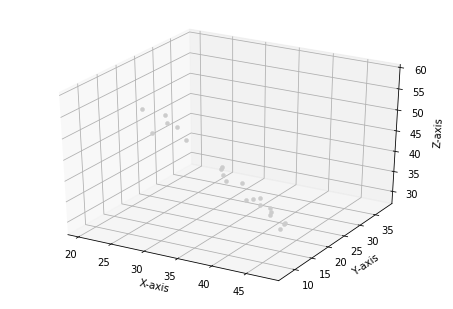

In [5]:
# 3D scatter
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

xs = df["A"]
ys = df["B"]
zs = df["O"]
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

ax.plot(df["A"], df["B"], df["O"], "o", color="#cccccc", ms=4, mew=0.5)
plt.show()

- なんらかの面に乗っているような気がする！